# Maths Lab - 7

## Teammates:
#### Akshita Potdar - 702768460
#### Kalyani Khandait - 702768391
#### Logesh Gangadharan - 702723890


## Problem -1



Train a neural network with one or more Linear layers to
predict the digits. Train your model on the given training set,
and measure its accuracy on the given test set

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


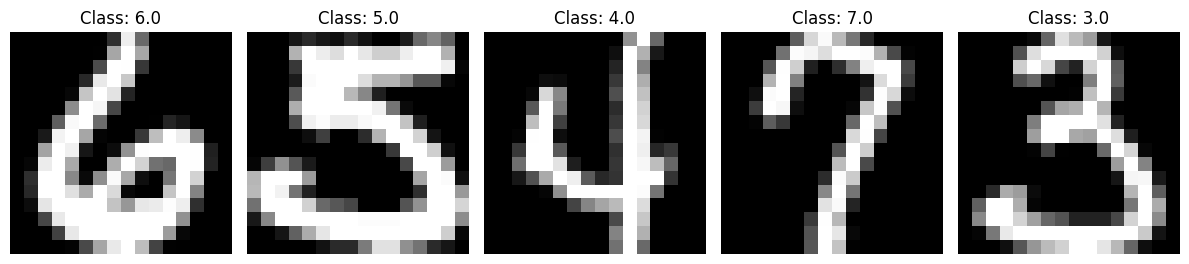

Epoch [30/300], Average Loss: 0.0060
Epoch [60/300], Average Loss: 0.0134
Epoch [90/300], Average Loss: 0.0008
Epoch [120/300], Average Loss: 0.0007
Epoch [150/300], Average Loss: 0.0007
Epoch [180/300], Average Loss: 0.0009
Epoch [210/300], Average Loss: 0.0009
Epoch [240/300], Average Loss: 0.0004


In [ ]:

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/My Drive/zip.train', header=None, sep=r'\s+')
test_df = pd.read_csv('/content/drive/My Drive/zip.test', header=None, sep=r'\s+')

X_train_data = train_df.iloc[:, 1:].values
y_train_data = train_df.iloc[:, 0].values
X_test_data = test_df.iloc[:, 1:].values
y_test_data = test_df.iloc[:, 0].values


plt.figure(figsize=(12, 6))
for idx in range(5):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(X_train_data[idx, :].reshape(16, 16), cmap='gray')
    plt.title(f'Class: {y_train_data[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train_data.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test_data.reshape(-1, 1))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(16 * 16, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

#dataset into PyTorch tensors
X_train_tensor = torch.tensor(X_train_data, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_data, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_data, dtype=torch.long)


batch_size = 64
train_tensor_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_data_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)


model = SimpleNN()


loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 300
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for inputs, targets in train_data_loader:
        optimizer.zero_grad()
        predictions = model(inputs)
        loss = loss_function(predictions, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 30 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {total_loss / len(train_data_loader):.4f}')

# evalution
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(test_predictions, 1)
    test_accuracy = accuracy_score(y_test_tensor, predicted_classes)

print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')


## Problem -2


Build a more sophisticated convolutional neural network model
to predict the digits. Use at least one 2d convolution layer
with several filters followed by a max pool. Your model should
end with Linear layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-cf6e15f428a3>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(train_file_path, delim_whitespace=True, header=None)
<ipython-input-6-cf6e15f428a3>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(test_file_path, delim_whitespace=True, header=None)


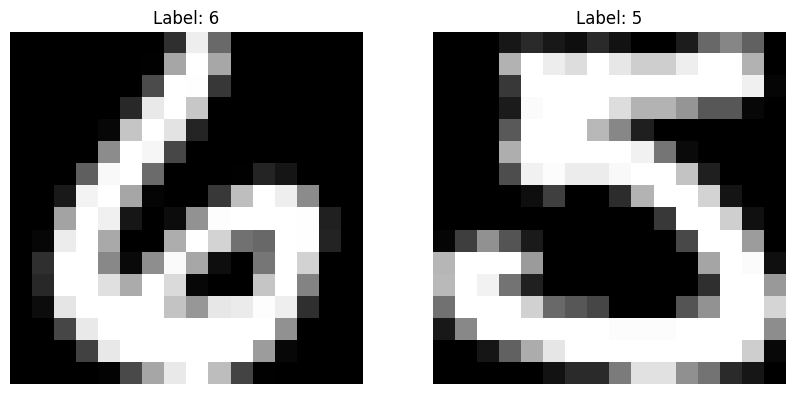

Shape of y_train after one-hot encoding: (7291, 10)
Shape of y_test after one-hot encoding: (2007, 10)
Epoch [1/25], Loss: 0.5373
Epoch [2/25], Loss: 0.1008
Epoch [3/25], Loss: 0.0791
Epoch [4/25], Loss: 0.0593
Epoch [5/25], Loss: 0.0503
Epoch [6/25], Loss: 0.0327
Epoch [7/25], Loss: 0.0269
Epoch [8/25], Loss: 0.0278
Epoch [9/25], Loss: 0.0181
Epoch [10/25], Loss: 0.0222
Epoch [11/25], Loss: 0.0165
Epoch [12/25], Loss: 0.0105
Epoch [13/25], Loss: 0.0102
Epoch [14/25], Loss: 0.0103
Epoch [15/25], Loss: 0.0097
Epoch [16/25], Loss: 0.0090
Epoch [17/25], Loss: 0.0101
Epoch [18/25], Loss: 0.0098
Epoch [19/25], Loss: 0.0063
Epoch [20/25], Loss: 0.0071
Epoch [21/25], Loss: 0.0055
Epoch [22/25], Loss: 0.0078
Epoch [23/25], Loss: 0.0085
Epoch [24/25], Loss: 0.0072
Epoch [25/25], Loss: 0.0055
Test Accuracy: 97.16%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

drive.mount('/content/drive')

train_file_path = '/content/drive/My Drive/zip.train'
test_file_path = '/content/drive/My Drive/zip.test'


train_data = pd.read_csv(train_file_path, delim_whitespace=True, header=None)
test_data = pd.read_csv(test_file_path, delim_whitespace=True, header=None)


X_train = train_data.iloc[:, 1:].values
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
Y_test = test_data.iloc[:, 0].values


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0, :].reshape(16, 16), cmap='gray')
plt.title(f"Label: {int(Y_train[0])}")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_train[1, :].reshape(16, 16), cmap='gray')
plt.title(f"Label: {int(Y_train[1])}")
plt.axis('off')
plt.show()

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(Y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(Y_test.reshape(-1, 1))

print("Shape of y_train after one-hot encoding:", y_train_onehot.shape)
print("Shape of y_test after one-hot encoding:", y_test_onehot.shape)

# Enhanced CNN Model
class OptimizedDigitClassifier(nn.Module):
    def __init__(self):
        super(OptimizedDigitClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(256 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 2 * 2)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1, 16, 16)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1, 16, 16)
y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
y_test_tensor = torch.tensor(Y_test, dtype=torch.long)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model = OptimizedDigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# training Model
def train_model(num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        scheduler.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

# testing
train_model(num_epochs=25)
evaluate_model()
